## 빈도 분석 & 기술 통계량 분석

### 1) 데이터 탐색과 빈도분석 

라이브러리

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

csv 파일 open

In [24]:
df = pd.read_csv('data/cosmetics_.csv', encoding = 'utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


컬럼 설명

In [41]:
df_col_ex = pd.read_excel('data/cosmetics_데이터 설명_수정.xlsx', encoding = 'utf-8')
df_col_ex.fillna('', inplace=True)
df_col_ex.drop(5, inplace=True) # aware: 인지 브랜드
df_col_ex.drop(['보기11', '보기12', '보기13', '보기14', '보기15', '보기16','보기17', '보기18', '보기19', '보기20', '보기21', '보기22', '보기23', '보기24', '보기25', '보기26', '보기27', '보기28', '보기29', '보기30', '보기31'], axis=1, inplace=True)
df_col_ex

,변수명,설명,속성,보기1,보기2,보기3,보기4,보기5,보기6,보기7,보기8,보기9,보기10
0,gender,성별,범주형,남자,여자,,,,,,,,
1,marriage,결혼여부,범주형,미혼,기혼,기타,,,,,,,
2,edu,학력,범주형,중졸 이하,고졸,대학교 재학,대학교 졸업,대학원 석사 재학,대학원 석사 졸업,대학원 박사 재학,대학원 박사 졸업,,
3,job,직업,범주형,단순노무/생산/단순기술직,경영/관리직,전문직,사무직,판매/서비스직,자영업자,가정주부,학생,무직,기타
4,mincome,월소득,범주형,100만원 이하,100~200만원 이하,200~300만원 이하,300~400만원 이하,400~500만원 이하,500만원 이상,,,,
6,count,연구매횟수,수치형,,,,,,,,,,
7,amount,1회구매비용,수치형,,,,,,,,,,
8,decision,구매 동기,범주형,사회적 요인,심리적인 요인,외모적 요인,,,,,,,
9,propensity,구매 성향,범주형,비교적 저렴한 제품,중간정도의 제품,비교적 고가의 제품,,,,,,,
10,skin,피부 타입,범주형,건성,민감성,중성,"지성, 여드름성",복합성,,,,,


값 변경 (apply / replace)

In [13]:
# gender [1, 2] -> ['male', 'female']
df.gender = df.gender.replace([1, 2], ['male', 'female'])
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,male,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,female,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,female,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,female,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,male,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


범주형 데이터 - 각 항목의 개수 count

In [17]:
df['gender'].value_counts() 

male      132
female    115
Name: gender, dtype: int64

차트

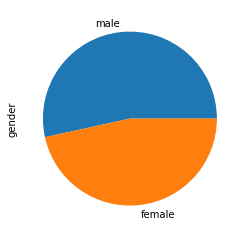

In [19]:
df.gender.value_counts().plot(kind = 'pie')

<br>

### 2) 데이터 탐색과 기술통계분석

In [22]:
df = pd.read_csv('data/cosmetics_.csv', encoding = 'utf-8')

기본 계산

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
gender        247 non-null int64
marriage      247 non-null int64
edu           247 non-null int64
job           247 non-null int64
mincome       247 non-null int64
aware         247 non-null int64
count         247 non-null int64
amount        247 non-null int64
decision      247 non-null int64
propensity    247 non-null int64
skin          247 non-null int64
promo         247 non-null int64
location      247 non-null int64
satisf_b      247 non-null int64
satisf_i      247 non-null int64
satisf_al     247 non-null int64
repurchase    247 non-null int64
dtypes: int64(17)
memory usage: 32.9 KB


In [27]:
df.amount.describe()

count    2.470000e+02
mean     1.539393e+05
std      3.980750e+05
min      3.000000e+03
25%      3.000000e+04
50%      5.200000e+04
75%      1.000000e+05
max      5.000000e+06
Name: amount, dtype: float64

In [24]:
df.amount.max() # 최대
df.amount.min() # 최소
df.amount.sum() # 합계
df.amount.mean() # 평균
df.amount.var() # 분산
df.amount.std() # 표준편차

In [25]:
df.mean() # 열(default 0) 기준 평균

gender             1.465587
marriage           1.712551
edu                4.566802
job                4.578947
mincome            3.757085
aware              3.319838
count              4.327935
amount        153939.271255
decision           2.388664
propensity         1.975709
skin               2.761134
promo              2.016194
location           2.465587
satisf_b           2.890688
satisf_i           3.404858
satisf_al          3.461538
repurchase         3.554656
dtype: float64

In [26]:
df.mean(axis = 1) # 행(1) 기준 평균

0        648.823529
1       1767.352941
2       5885.352941
3       3826.941176
4       2944.000000
5       5885.000000
6       5885.294118
7       2297.470588
8       2355.705882
9       5884.941176
10      2944.352941
11      1767.000000
12     18826.588235
13     11767.117647
14      3532.176471
15      2943.705882
16     58826.176471
17     88238.529412
18      4708.411765
19      1767.529412
20     20591.235294
21     14708.941176
22      2945.235294
23      1178.882353
24      2473.294118
25      2473.529412
26      2356.705882
27      4120.823529
28     11768.000000
29     11767.235294
           ...     
217     1767.882353
218     2944.647059
219      590.058824
220      590.470588
221     2943.941176
222     3531.823529
223     2943.764706
224    29414.882353
225     2943.294118
226     5884.705882
227     2943.941176
228     1179.529412
229     2061.411765
230     1767.294118
231     2943.941176
232     2943.882353
233     4708.588235
234     1178.941176
235     1473.470588


히스토그램

- 변수의 분포, 중심 경향, 퍼짐 정도, 치우침 정도 등 한눈에 살펴보기위해
- 도수 분포를 정보 그림으로 나타낸 것 (도수분포표 -> 그래프)
- 가로축이 계급 / 세로축이 도수 (기본)

In [34]:
df['marriage'] = df['marriage'].replace([1, 2, 3], ['single', 'married', 'other'])

In [35]:
df.marriage.value_counts()

married    176
single      71
Name: marriage, dtype: int64

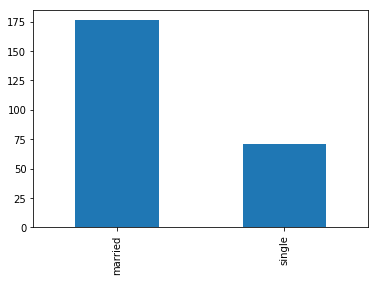

In [36]:
# 각 범주별 개수 표수
df.marriage.value_counts().plot(kind='bar')

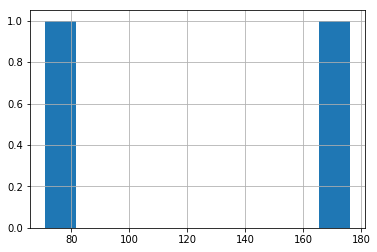

In [37]:
# 출현 빈도의 분포 - 히스토그램
df.marriage.value_counts().hist()
# df.marraige.value_counts().plot(kind='hist')

왜도와 침도
- 왜도(비대칭도): 분포가 치우처진 정도
![skew.png](image/skew.png)
음수일 경우 왼쪽에 긴 꼬리를 가지며 양수일 경우 오른쪽으로 긴 꼬리를 가짐
(절대값 기준 3 미초과)

- 첨도: 확률분포의 뾰족한 정도, 관측지들이 어느정도 집중적으로 중심에 몰려있는가
![img](image/kurt.png)
첨도가 클수록 더욱 뾰족한 모양
<br>
<br>
-> 왜도가 0, 첨도가 1일때 완전한 정규분포

왜도(Skewness)

In [38]:
df.amount.skew()

8.727245406515182

In [40]:
df.decision.skew()

-0.7874015776363626

첨도(Kurtosis)

In [39]:
df.amount.kurtosis()

94.95150601199587

In [42]:
df.job.kurtosis()

-0.12032961249934582

연 구매 횟수와 1회 평균 구매 비용을 기준으로 히스토그램 plot

In [43]:
df.describe()

,gender,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,1.465587,4.566802,4.578947,3.757085,3.319838,4.327935,1.539393e+05,2.388664,1.975709,2.761134,2.016194,2.465587,2.890688,3.404858,3.461538,3.554656
std,0.499827,1.709191,2.199603,1.674079,5.575692,4.422061,3.980750e+05,0.761599,0.680310,1.488311,0.821300,1.073437,0.780995,0.830110,0.752731,0.724182
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000e+04,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
50%,1.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.200000e+04,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,2.000000,6.000000,6.000000,5.000000,2.000000,5.000000,1.000000e+05,3.000000,2.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000
max,2.000000,8.000000,10.000000,6.000000,31.000000,36.000000,5.000000e+06,3.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002165CBAAE10>,
      dtype=object)

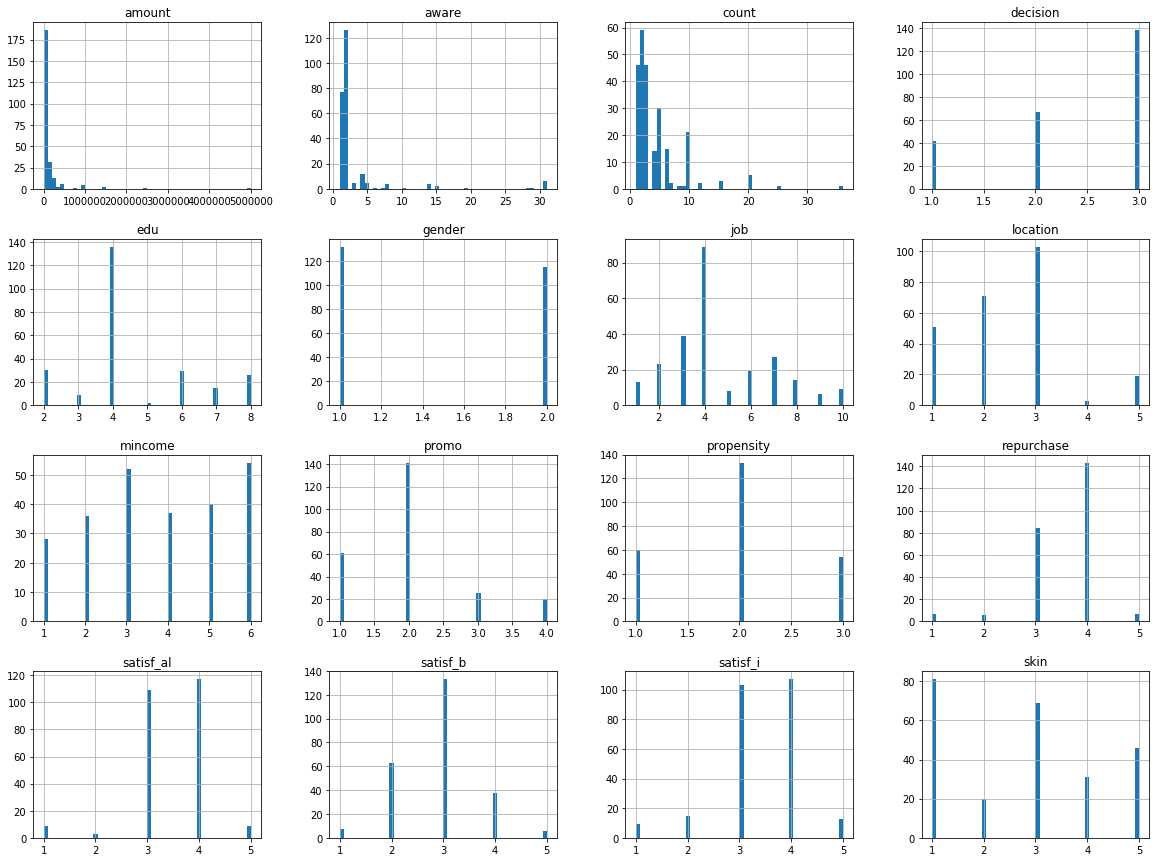

In [45]:
df.hist(bins=50, figsize=(20,15))

수치형 열에 대해 이상치를 제거한 후 분포 확인

amount (연 구매 개수)

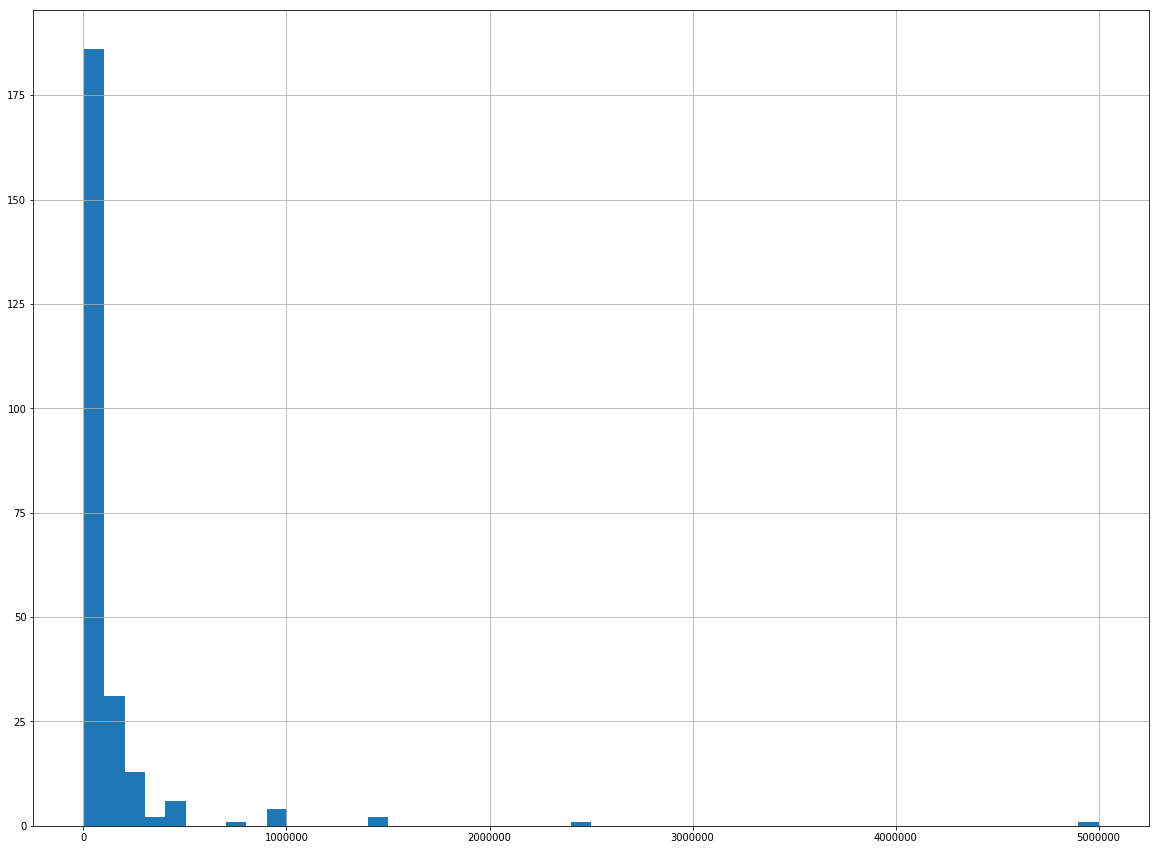

In [48]:
df.amount.hist(bins=50, figsize=(20, 15))

count (연 구매 횟수)

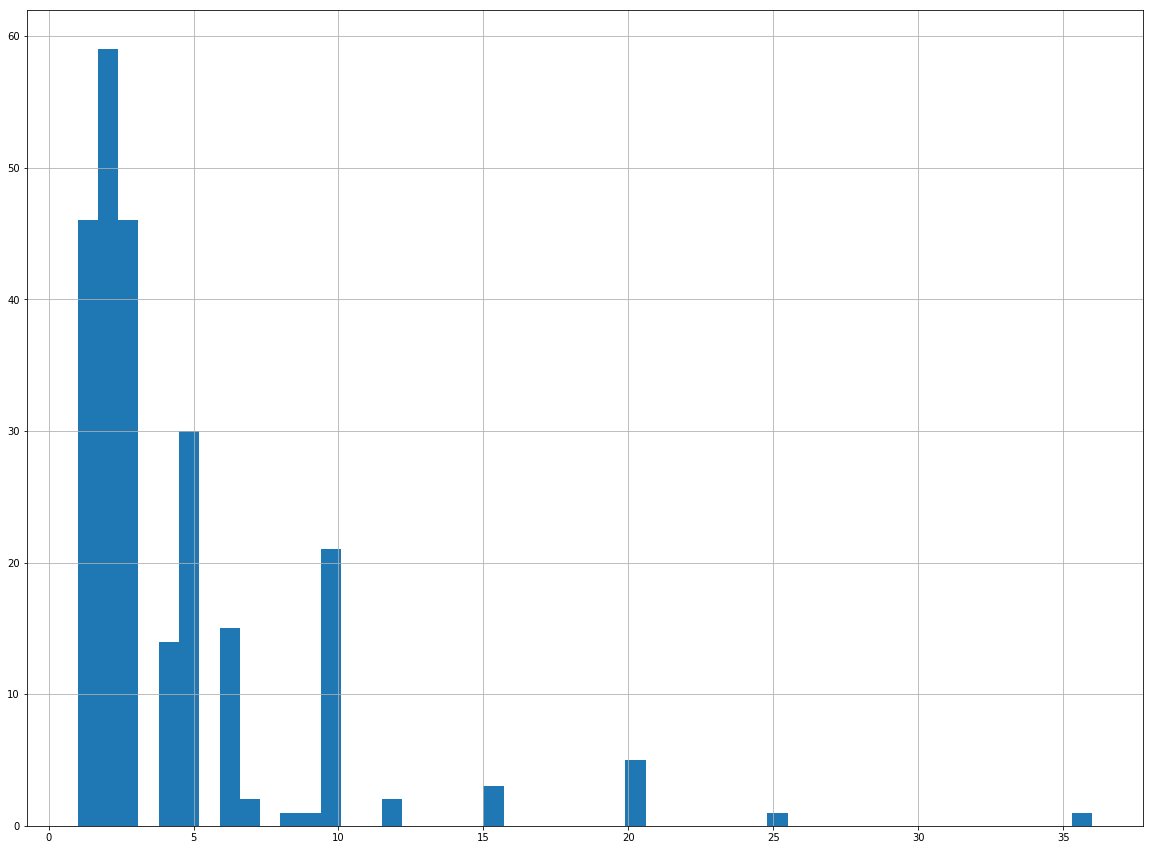

In [52]:
df['count'].hist(bins=50, figsize=(20, 15))

Seaborn

In [3]:
import seaborn as sns

- distribution plot: 히스토그램

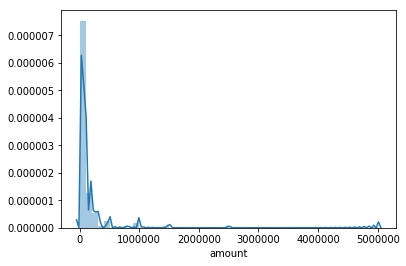

In [54]:
sns.distplot(df.amount, rug=False)
# rug=True(default) x축 위의 작은 선분으로 실제 데이터의 위치 나타냄

- joinplot: 산점도와 히스토그램을 한번에

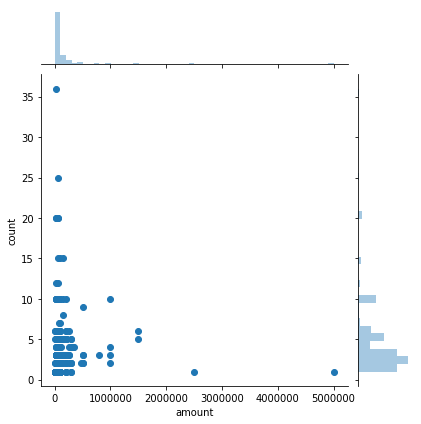

In [55]:
sns.jointplot(x="amount", y="count", data=df)

- kernel-density(kde): 추정한 확률밀도함수를 겹쳐 그려주는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여줌 (등고선 형태)

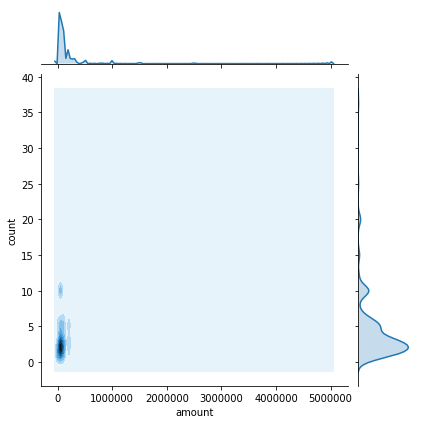

In [56]:
sns.jointplot(x="amount", y="count", data=df, kind="kde")

<br>

### 3) Outlier(이상치) 탐지 및 제거와 전후 분포 비교

수염상자그림
![img](image/iqr.png)
- Median Q2: 중위값(중간값)
- Lower Quartile Q1: 하위 25%
- Lower Whisker: Q3 - 1.5 * IQR
- Upper Quartile Q3: 상위 25%
- Upper Whisker: Q3 + 1.5 * IQR
- Interquartile Range (IQR) = Q3 - Q1

quartile / quantile / percentile

![img](image/quan.jpg)

In [57]:
df.amount.describe()

count    2.470000e+02
mean     1.539393e+05
std      3.980750e+05
min      3.000000e+03
25%      3.000000e+04
50%      5.200000e+04
75%      1.000000e+05
max      5.000000e+06
Name: amount, dtype: float64

In [ ]:
df.amount.quantile() # default 0.5
df.amount.quantile(q=0) # 최소
df.amount.quantile(q=1) # 최대

In [60]:
Q2 = df.amount.quantile(q=0.5) 
Q1 = df.amount.quantile(q=0.25) 
Q3 = df.amount.quantile(q=0.75)
print('Q1 {} / Q2 {} / Q3 {}'.format(Q1, Q2, Q3))

Q1 30000.0 / Q2 52000.0 / Q3 100000.0


![img](image/quan2.png)

In [59]:
IQR = Q3 - Q1
IQR

70000.0

Outlier 기준
- 상한치 : 바닥부터 75% 지점의 값 + IQR의 1.5배 
- 하한치 : 바닥부터 25% 지점의 값 - IQR의 1.5배 

그 기준을 넘기면 Outlier로 판단이 가능 

In [61]:
Q1 - 1.5 * IQR # 미만

-75000.0

In [62]:
Q3 + 1.5 * IQR # 초과

205000.0

In [67]:
df_outlier = df[ ( (df['amount'] > Q3 + IQR * 1.5) | (df['amount'] < Q1 - IQR * 1.5) )]  
df_outlier

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
12,2,married,4,4,3,4,4,320000,2,3,3,3,2,4,4,4,4
16,1,married,8,3,2,5,3,1000000,1,3,1,2,2,3,3,3,3
17,2,single,3,8,5,1,6,1500000,3,3,2,4,1,4,4,4,4
20,2,married,2,4,2,8,4,350000,3,2,3,2,2,3,4,4,4
21,2,married,4,7,6,1,4,250000,3,3,2,2,3,2,3,4,4
39,2,married,2,6,2,2,6,250000,3,2,2,4,3,2,3,3,4
53,2,married,4,3,3,14,1,2500000,1,2,1,2,2,4,4,4,4
54,1,married,4,4,5,4,2,1000000,3,2,1,1,1,3,3,3,3
57,1,married,4,3,6,31,2,300000,3,3,3,2,1,3,3,4,4
59,2,single,8,3,6,1,2,500000,1,3,2,2,1,3,4,4,4


In [68]:
# oulier 아닌 것
df_IQR = df[ (df['amount'] < Q3 + IQR * 1.5) & (df['amount'] > Q1 - IQR * 1.5) ]

outlier 제거 전

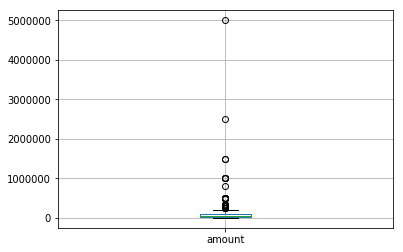

In [70]:
df.boxplot(column='amount')

oulier 제거 후

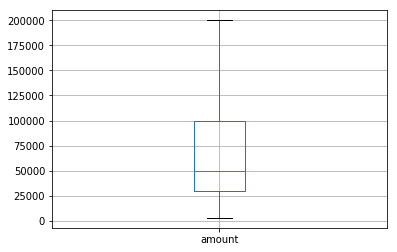

In [69]:
df_IQR.boxplot(column='amount')

outlier 제거 후 더 확대하여 데이터 분포 확인할 수 있음

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002166194FE10>,
      dtype=object)

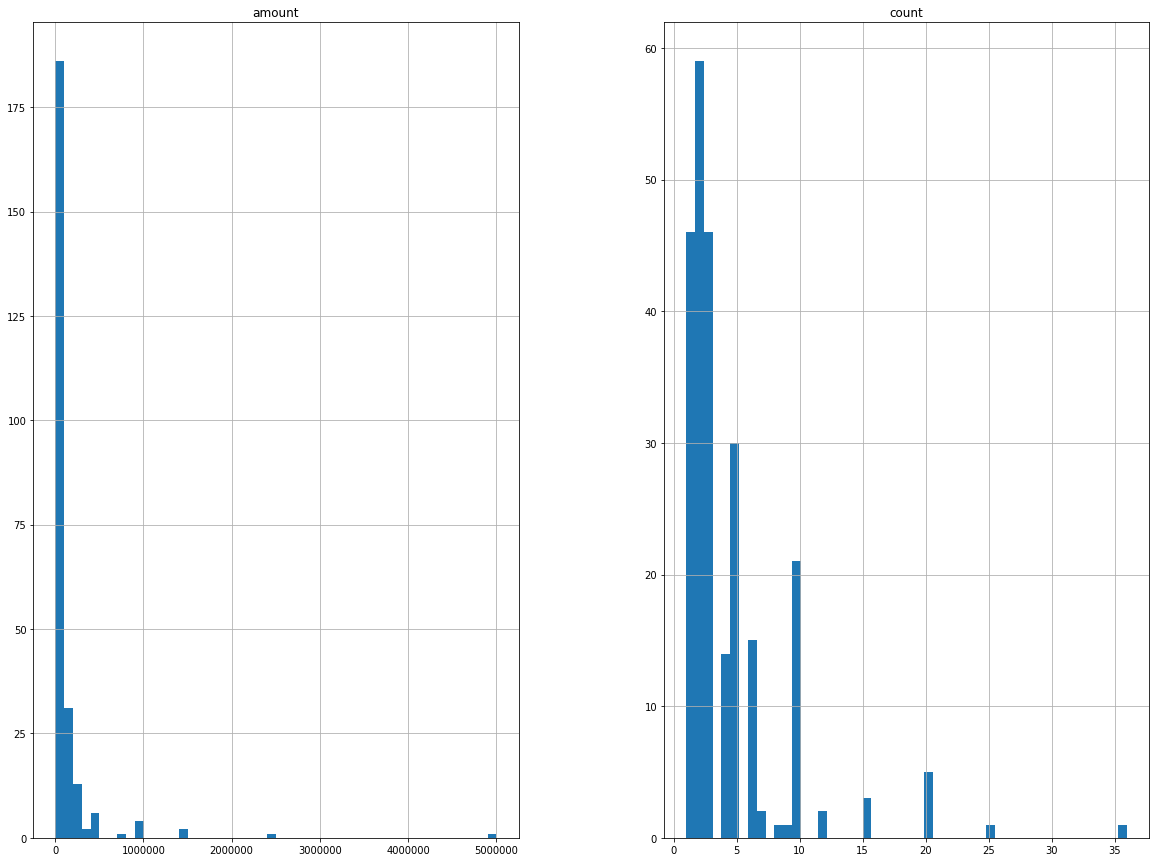

In [71]:
# 제거 전
df[['amount', 'count']].hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021661B84E48>,
      dtype=object)

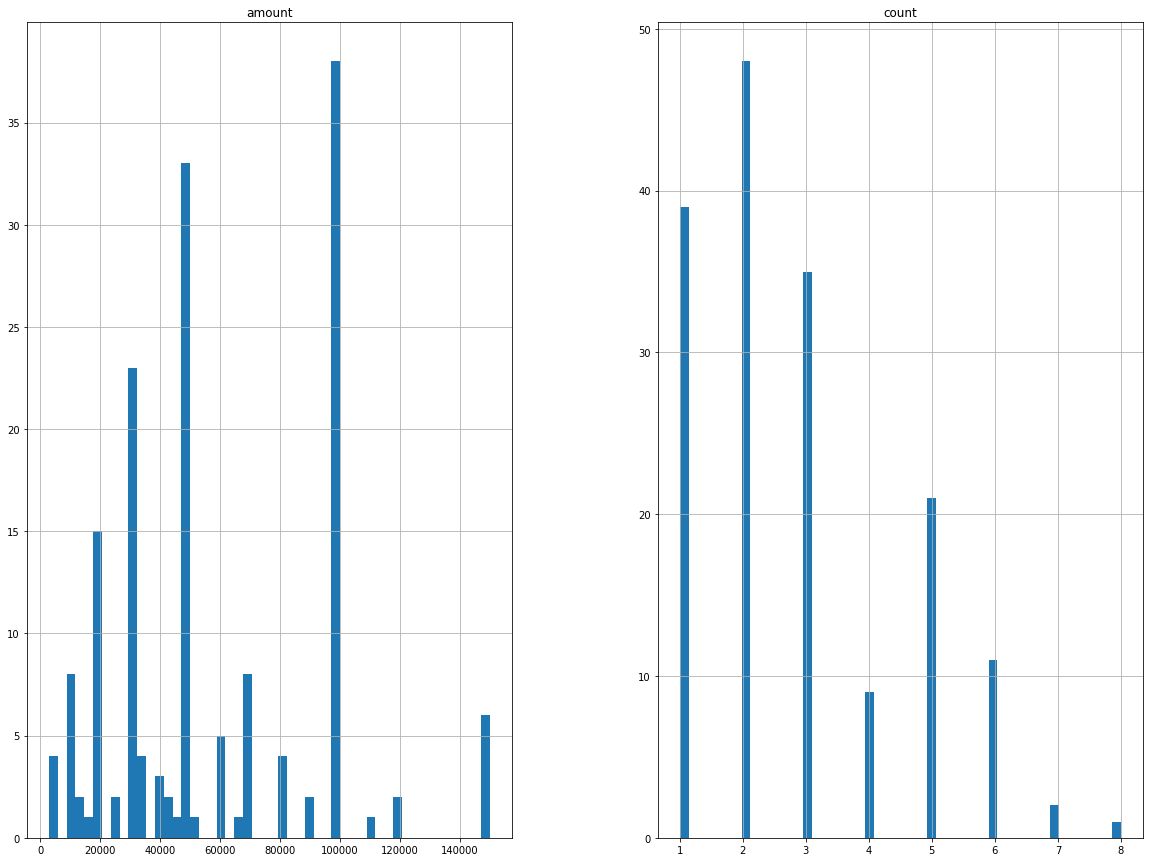

In [72]:
# 제거 후 
processed_df = df[['amount', 'count']]
# 상한선에 해당하는 값 제거
processed_df = processed_df[ (processed_df['count'] < 10) & (processed_df['amount'] < 200000) ] 
processed_df.hist(bins=50, figsize=(20,15))

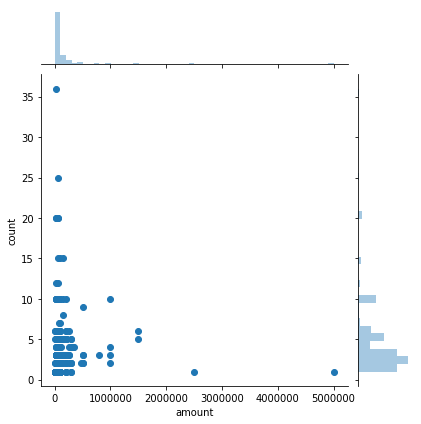

In [74]:
# 전
sns.jointplot(x="amount", y="count", data=df)

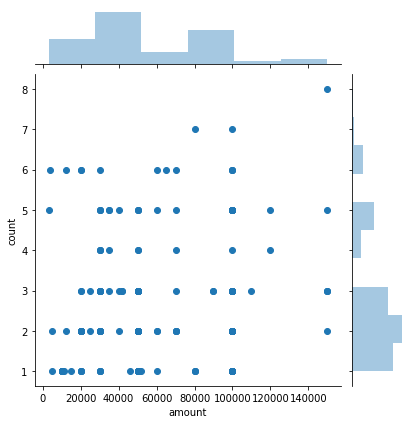

In [75]:
# 후
sns.jointplot(x="amount", y="count", data=processed_df)

log 함수를 이용한 Data Scaling

: 큰 수를 같은 비율의 작은 수로 바꿔주는 역할

정규화 방법
- min-max scalor
- standard scalor
- log 

In [76]:
processed_df.head()

,amount,count
0,11000,1
1,30000,4
2,100000,6
3,65000,6
4,50000,2


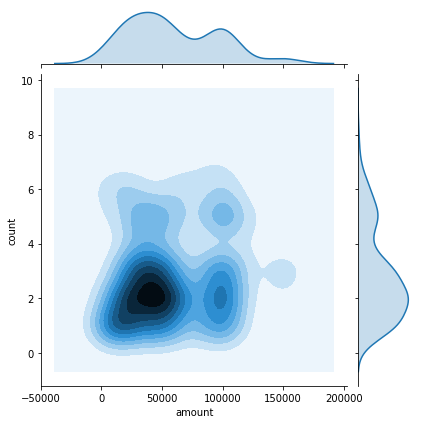

In [77]:
# count에 비해 amount의 scale이 너무 큰 상태
sns.jointplot(x="amount", y="count", data=processed_df, kind="kde")

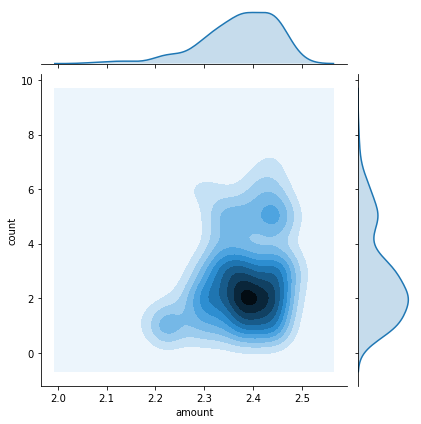

In [79]:
processed_df.amount = np.log(processed_df.amount)
sns.jointplot(x="amount", y="count", data=processed_df, kind="kde")

---

<br>

## 교차검정 & 평균차이검정, 상관관계 분석

### 1) 교차분석의 실습과 시각화

라이브러리

In [80]:
import pandas as pd
import seaborn as sns

import scipy as sp
from scipy import stats # statistics

In [5]:
df = pd.read_csv('data/cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


교차표 (cross-table)

In [84]:
crosstab = pd.crosstab(df.propensity, df.skin, margins=True)
# margins=True 합계 값(All) 표시
# propensity: 구매 성향
# skin: 피부 타입

crosstab.columns = ["건성", "민감성", "중성", "지성", "여드름성", "합계"]
crosstab.index = ["비교적 저렴한 제품", "중간정도의 제품", "비교적고가의 제품", "합계"]
crosstab

,건성,민감성,중성,지성,여드름성,합계
비교적 저렴한 제품,22,1,12,11,14,60
중간정도의 제품,39,8,47,16,23,133
비교적고가의 제품,20,11,10,4,9,54
합계,81,20,69,31,46,247


In [85]:
pd.crosstab(df.propensity, df.skin, margins=True, normalize=True)
# normalize=True 합계가 1이 되도록 -> 상대적인 비율 확인 가능

skin,1,2,3,4,5,All
propensity,,,,,,
1,0.089069,0.004049,0.048583,0.044534,0.056680,0.242915
2,0.157895,0.032389,0.190283,0.064777,0.093117,0.538462
3,0.080972,0.044534,0.040486,0.016194,0.036437,0.218623
All,0.327935,0.080972,0.279352,0.125506,0.186235,1.000000


Chi-square 검정 (test)

: 두 범주형 변수 사이의 관계가 있는지 없는지 검정 (독립성 검정)

In [86]:
stats.chisquare(df.propensity, df.skin)

Power_divergenceResult(statistic=291.8166666666667, pvalue=0.023890557260065975)

- 귀무가설: 구매 성향에 따라 피부 타입에 차이가 없다. (independent, 구매 성향 <-> 피부 타입, vice versa)
-  대립가설: 구매 성향에 따라 피부 타입에 차이가 있다. (not independent)

-> pvalue = 0.02 < 0.05

-> 대립가설, 유의미한 차이가 있다

구매 성향과 피부 타입 사이 관계가 없다는 전제 하에 현재와 같은 데이터를 만나거나 현재보다 더 귀무가설을 반박하는(더 밀접하게 관계를 갖는) 결과를 만날 확률

---

### p-value

귀무가설을 지지하는 정도

귀무가설: 참이라는 전제 하에(조건) 관찰이 완료된 값 혹은 그보다 더 극단적인 값이 표본(샘플데이터)을 통해 나타날 조건부 확률

- p-value < 0.05 (5%) 귀무가설 기각(버림)
- p-value >= 0.05 (5%) 귀무가설 기각하지 않음(인정) 

예) p-value가 0.209일 경우, 귀무가설이 참일 때 이번 실험의 측정치(a 그룹의 b 수치 평균값)가 나타날 확률이 20%가 넘는다.

- 귀무가설을 기각한다는 것은 5% 만큼 귀무가설이 참일 가능성이 있다는 말이기도 함
- 귀무가설을 버린다해서 항상 대립가설(연구 결과가 참이거나 효과가 있다)이 맞는것은 아님

(통계적으로만 유의미할 뿐 독립변수의 변화에 따른 종속변수의 변화값이 실질적/실용적인 의미를 갖지 않음)

<br>

귀무가설 (default)

- 표본 데이터를 사용하여 모집단에 대한 주장(귀무가설)의 타당성을 검정한다.
- 두 가지 현상 사이에 관계가 없다.
- 독립변수 종속변수에 대해 유의한 영향을 미치지 않는다 (independent)


예) 무죄추정의 원칙에 따라 이 용의자는 무죄일 것이다!

<br>

대립가설

- 우리가 검증하고자 하는 바
- 귀무가설과 반대로 실험이나 연구를 통해 입증하려고 하는 주장
- 독립변수는 종속변수에 중요한 영향을 미친다 (not independent)

예) 이 용의자가 범인일 것이다!

<br>

p-value

- [조건부확률] 귀무가설이 참이라는 전제 하에(두 현상 사이 관계가 없다는 전제 하에) 관찰이 완료된 값 혹은 그보다 더 극단적인 값이 표본(샘플데이터)을 통해 나타날 확률
- 귀무가설을 지지하는 정도
- 귀무가설이 맞다는 전제 하에 표본에서 실제로 관측된 통계치와 같거나 더 극단적인 통계치가 관측될 확률
- 귀무가설이 맞다고 가정할 때(관계가 없다) 얻은 결과보다 극단적인 결과가 관측될 확률


예) 피자 배달 시간의 평균이 30분 이내이다

-> [귀무가설치 암이라는 전제 하에]총 1000개의 데이터에서 100개의 데이터를 샘플링 했을 때 이론적으로 나올 수 있는 평균의 분포에서 지금 가지고 있는 값이 30보다 큰 값이 나올 확률

<br>

---

In [87]:
# 구매 성향
df['propensity'] = df['propensity'].replace([1, 2, 3], ['low cost', 'middle cost', 'high cost'])
# 피부 타입
df['skin'] = df['skin'].replace([1, 2, 3, 4, 5], ['dry skin', 'sensitive skin', 'neutral skin', 'oily skin', 'complex skin'])

ct = pd.crosstab(df.propensity, df.skin, margins=True)
ct

skin,complex skin,dry skin,neutral skin,oily skin,sensitive skin,All
propensity,,,,,,
high cost,9,20,10,4,11,54
low cost,14,22,12,11,1,60
middle cost,23,39,47,16,8,133
All,46,81,69,31,20,247


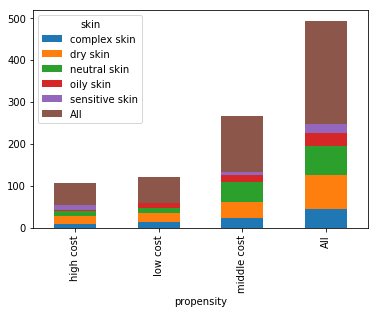

In [88]:
# ct.plot(kind='bar', stackted=True)
ct.plot.bar(stacked=True)

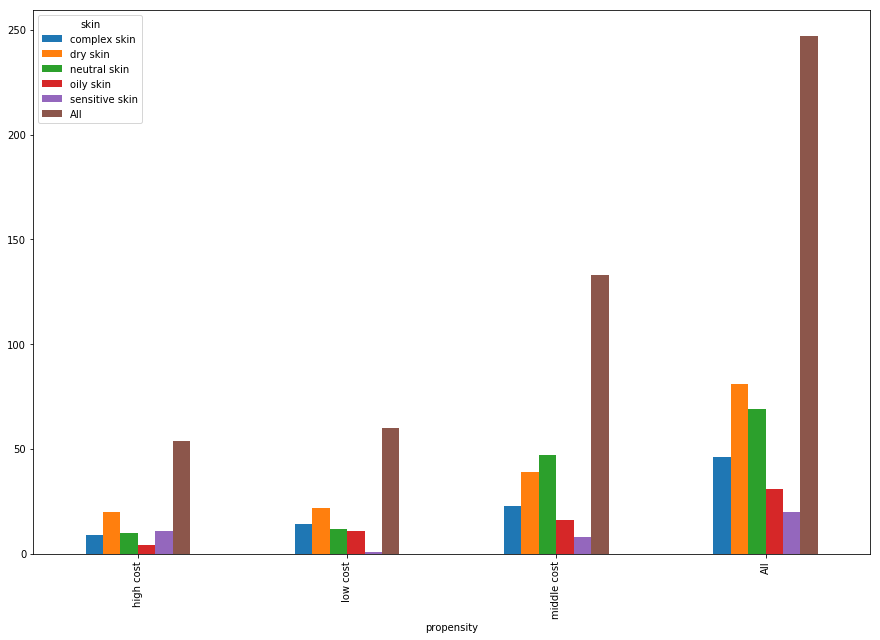

In [90]:
ct.plot.bar(stacked=False, figsize=(15, 10))

<br>

### 2) 독립표본 t-test 분석의 실습과 시각화

두 집단간의 평균차이를 검정

예) 1반과 2반의 중간고사 영어과목 성적 평균차이

In [92]:
df = pd.read_csv('data/cosmetics_.csv', encoding='utf-8')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


In [94]:
# satisf_al : 전반적인 만족도 (매우 불만족, 불만족, 보통, 만족, 매우 만족)

male = df[ df['gender']==1 ].satisf_al.values # 남성 만족도
female = df[ df['gender']==2 ].satisf_al.values # 여성 만족도

T-test for independent samples

두 집단간 평균값 사이 유의미한 차이가 있는지

In [95]:
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-0.494589803056421, pvalue=0.6213329051985961)

p-value = 0.6 > 0.05

-> 귀무가설이 참일 확률이 높음

-> 서로 다른 성별 간 전반적인 만족도의 평균값 사이 유의미한 차이가 없다.

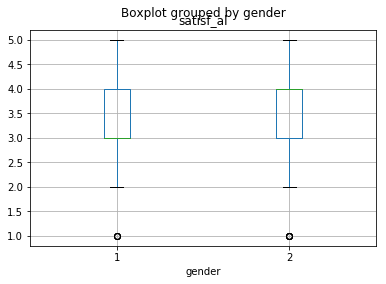

In [96]:
df.boxplot(column='satisf_al', by='gender')

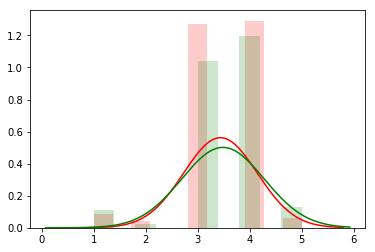

In [97]:
# kde=False =각의 빈도 수에 따른 밀도 함수 그래프를 가리고 평균만 표시
# fit에 scipy.stats.norm을 지정하여 분포에 대한 그래프 선을 그려줌
# hist_kws & fit_kws 는 히스토그램과 fitting line의 서식을 지정하는 keywords

sns.distplot(male, kde=False, fit=stats.norm, hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})
sns.distplot(female, kde=False, fit=stats.norm, hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})

<br>

### 3) 대응표본 t-test 분석의 실습과 시각화

동일한 모집단으로부터 추출된 두 변수의 평균값 비교 분석

예) 1반의 중간고사와 기말고사 영어 성적 평균 사이의 차이

In [98]:
df[['satisf_b', 'satisf_i']].describe()
# satisf_b : 구매 가격에 대한 만족도 (5점 척도)
# satisf_i : 구매 문의에 대한 만족도 (5점 척도)

,satisf_b,satisf_i
count,247.000000,247.000000
mean,2.890688,3.404858
std,0.780995,0.830110
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


- 귀무가설: 247명의 고객이 평가한 구매 가격에 대한 만족도의 평균은 구매 문의에 대한 만족도의 평균과 차이가 없다.

- 대립가설: 247명의 고객이 평가한 구매 가격에 대한 만족도의 평균은 구매 문의에 대한 만족도의 평균과 차이가 있다.

In [99]:
# T-test for two related samples (동일 대상에 대한 2가지 변수값)

stats.ttest_rel(df["satisf_b"], df["satisf_i"])

Ttest_relResult(statistic=-7.155916401026872, pvalue=9.518854506666398e-12)

-> pvalue = 9.5e-12 < 0.05

-> 대립가설

-> "동일한" 고객 집단이 평가한 구매 가격에 대한 만족도와 구매 문의에 대한 만족도의 평균값 사이에 유의미한 차이가 있다.

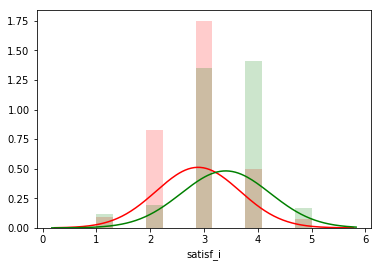

In [100]:
# kde=False 로 해주어야 각각의 빈도 수에 따른 밀도 함수 그래프를 가리고 평균만 나타낼 수 있음
# fit에 scipy.stats.norm을 지정하여 분포에 대한 그래프 선을 그려줄 수 있음
# hist_kws & fit_kws 는 히스토그램과 fitting line의 서식을 지정하는 keywords

sns.distplot(df["satisf_b"], kde=False, fit=stats.norm,
            hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})

sns.distplot(df["satisf_i"], kde=False, fit=stats.norm, 
             hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})

<br>

### 4) 분산분석의 실습과 시각화

ANOVA (Analysis Of Variance)

In [101]:
# decision : 구매동기 (사회적 요인, 심리적 요인, 외모적 요인)
# satisf_al : 전반적인 만족도

decision_social = df[ df['decision']==1 ].satisf_al.values # 사회적 요인
decision_psychi = df[ df['decision']==2 ].satisf_al.values # 심리적 요인
decision_appear = df[ df['decision']==3 ].satisf_al.values # 외모적 요인

- 귀무가설: 구매동기에 따라 전반적인 만족도의 평균값에 차이가 없다.
- 대립가설: 구매동기에 따라 전반적인 만족도의 평균값 중 적어도 하나는 차이가 있다.

In [102]:
# 독립변수 1개 (구매동기)
stats.f_oneway(decision_social, decision_psychi, decision_appear) 

F_onewayResult(statistic=4.732129410493065, pvalue=0.009632034309915485)

-> pvalue < 0.05

-> 대립가설

-> 3가지 구매 동기에 따른 만족도의 평균값 중 적어도 하나는 유의미한 차이가 있다.

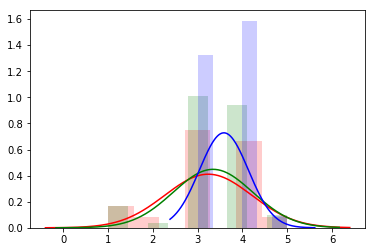

In [103]:
sns.distplot(decision_social, kde=False, fit=sp.stats.norm, hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})
sns.distplot(decision_psychi, kde=False, fit=sp.stats.norm, hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})
sns.distplot(decision_appear, kde=False, fit=sp.stats.norm, hist_kws={'color': 'b', 'alpha': 0.2}, fit_kws={'color': 'b'})

-> 외모적 요인으로 구매하는 고객의 만족도가 높다

<br>

### 5) 상관관계 분석의 실습과 시각화

상관관계: 2개 변수가 어떤 선형적 또는 비선형적 관계를 가지고 있는지 분석

피어슨 상관계수: 두 계량형 변수 사이 선형관계의 강도와 방향

- 1에 가까울수록 음의 상관관계
- 1에 가까울수록 양의 상관관계
- 0에 가까울수록 상관관계가 적음

In [6]:
# 구매 동기, 구매가격 만족, 구매문의 만족, 전반 만족도, 재구매의향
df_corr = df[['decision', 'satisf_b', 'satisf_i', 'satisf_al', 'repurchase']]

In [7]:
df_corr.corr()

,decision,satisf_b,satisf_i,satisf_al,repurchase
decision,1.000000,0.003376,0.135887,0.189271,0.219292
satisf_b,0.003376,1.000000,0.018379,-0.031382,-0.028924
satisf_i,0.135887,0.018379,1.000000,0.584506,0.510771
satisf_al,0.189271,-0.031382,0.584506,1.000000,0.565028
repurchase,0.219292,-0.028924,0.510771,0.565028,1.000000


상관관계 히트맵

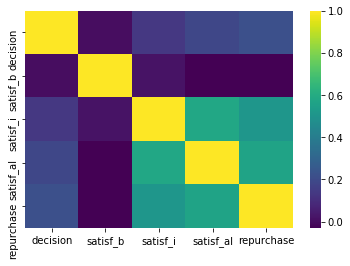

In [8]:
sns.heatmap(df_corr.corr(), cmap='viridis')
plt.show()

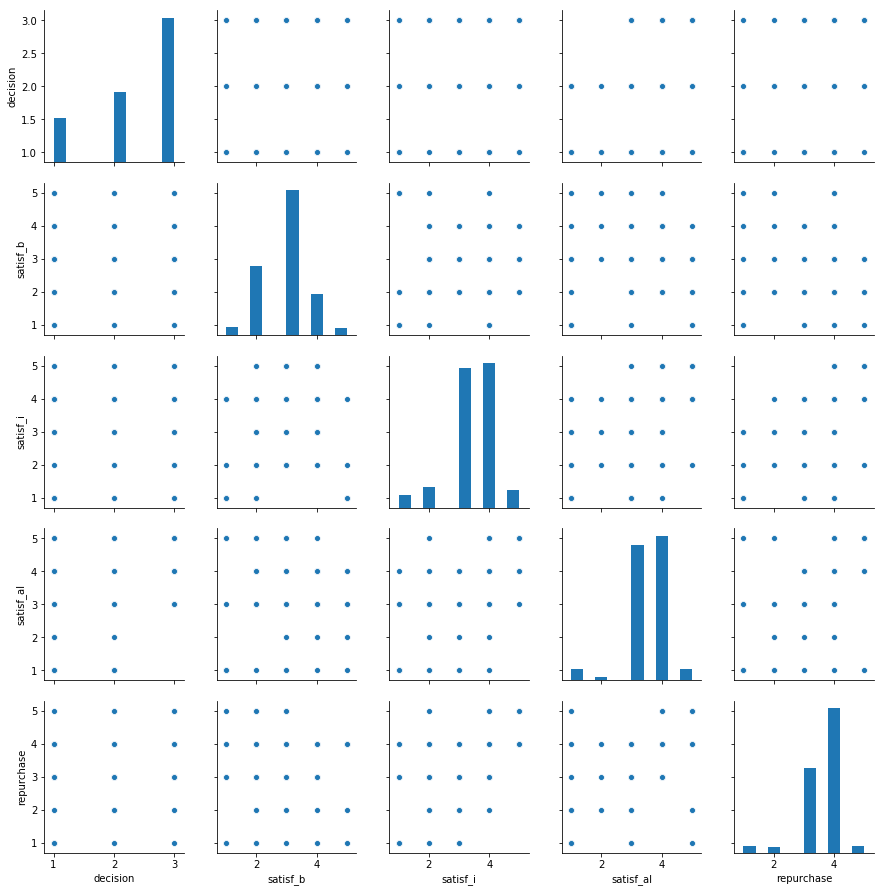

In [105]:
sns.pairplot(df_corr)

기본 제공 데이터셋 iris

In [106]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


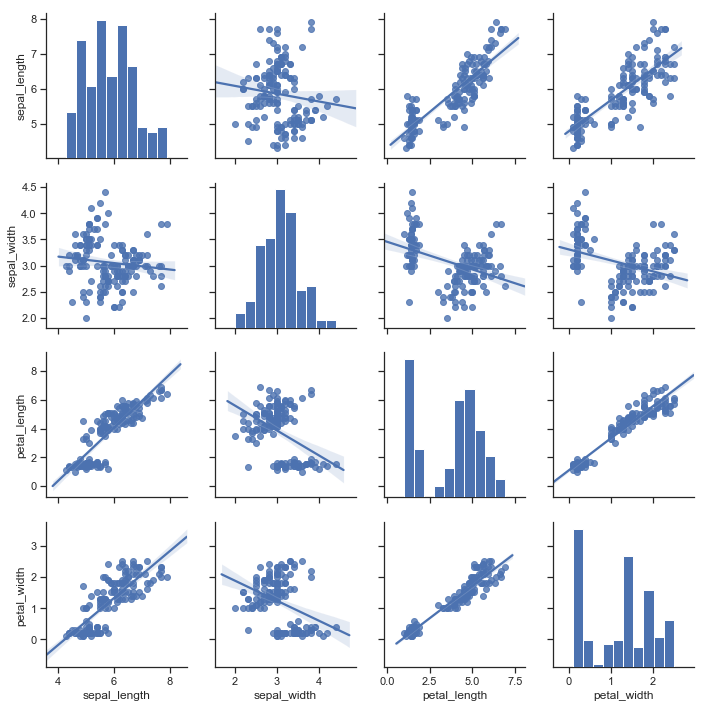

In [111]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, kind="reg")

---

<br>

##  그로스 해킹을 위한 파이썬 통계분석 활용

### 1) 사용자 참여와 마케팅 비용에 대한 상관관계 분석 (with 피어슨 상관 계수)

라이브러리

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

매월 유튜브에 광고 비율을 지출하여 신규 고객(구매/회원가입) 획득

In [3]:
# 집행된 유튜브 광고 비용 (단위 : 10,000원)
marketing_costs = [352, 164, 210, 425, 503, 232, 321, 556, 464, 578, 612, 434] 
# (단위 : 명)
user_acquired = [7214, 6122, 6896, 8020, 10982, 9021, 9240, 10210, 9987, 11521, 9792, 9852] 

ad_df = pd.DataFrame({'Marketing_Costs':marketing_costs, 'User_Acquired':user_acquired})
ad_df.head()

,Marketing_Costs,User_Acquired
0,352,7214
1,164,6122
2,210,6896
3,425,8020
4,503,10982


단순 CAC(Customer Acquisition Cost, 신규고객 유치비용) 계산

In [5]:
# 총 마케팅 비용 / 총 신규고객 수
cac = ad_df['Marketing_Costs'].sum() / ad_df['User_Acquired'].sum()

print('1명의 신규 고객을 얻기 위한 평균 유튜브 광고 비용: {:.0f}원'.format(cac * 10000))

1명의 신규 고객을 얻기 위한 평균 유튜브 광고 비용: 446원


-> 해당 금액만큼 유튜브 광고에 쓰면 그만큼 유저가 늘어날까?

In [6]:
ad_df.corr() # p-value

,Marketing_Costs,User_Acquired
Marketing_Costs,1.000000,0.803578
User_Acquired,0.803578,1.000000


피어슨 상관계수

In [7]:
result = stats.pearsonr(ad_df['Marketing_Costs'], ad_df['User_Acquired']) 
# 피어슨 상관계수, p-value

print("피어슨 상관계수 :", result[0])
print('p-value :', result[1])

피어슨 상관계수 : 0.8035775069546848
p-value : 0.0016386012345537542


p-value가 0.05 미만임으로, <br>월별 유튜브 광고 비용과 신규 고객 수가 통계적으로 유의미한 상관관계가 없다(상관계수==0)인 전제 하에<br> 이러한 측정 결과가 나올 확률이 0.16% 라고 할 수 있음

#### -> 월별 유튜브 광고 비용과 신규 유저 수 사이에는 통계적으로 유의미한 강한 상관관계(+0.8)가 있다.

<br>

### 2) A/B Test for Duration Time

페이지 구성과 세부 디자인을 다르게 만든 2개의 웹사이트 시안을 기반으로 A/B test 진행 <br>
웹사이트 시안 A, B에 각각 유입된 유저들이 실제로 각 웹사이트 내의 체류시간(Duration time) 측정 <br>

In [8]:
# np.nan <- Not A Number (결측치)

web_a = pd.DataFrame([20.5, 12.6, 19.5, 18.8, 13.4, 13.5, 17.5, np.nan, 12.8, 17.8, np.nan, 23.1, 10.6, np.nan, 11.5], 
                     columns=['Duration_A'])

web_b = pd.DataFrame([11.8, 10.7, np.nan, 12.5, np.nan, 14.9, 12.1, 13.9, 10.3, 9.0, 13.3, 12.4, 12.5], 
                     columns=['Duration_B'])

In [9]:
web_a.head()

,Duration_A
0,20.5
1,12.6
2,19.5
3,18.8
4,13.4


In [10]:
pd.concat([web_a, web_b], axis=1) # web_a, web_b 행 기준으로 합침

,Duration_A,Duration_B
0,20.5,11.8
1,12.6,10.7
2,19.5,NaN
3,18.8,12.5
4,13.4,NaN
5,13.5,14.9
6,17.5,12.1
7,NaN,13.9
8,12.8,10.3
9,17.8,9.0


In [11]:
print('웹사이트 시안 A에 대한 유저들의 평균 체류시간: {}'.format(web_a.mean()))
print('웹사이트 시안 B에 대한 유저들의 평균 체류시간: {}'.format(web_b.mean()))

웹사이트 시안 A에 대한 유저들의 평균 체류시간: Duration_A    15.966667
dtype: float64
웹사이트 시안 B에 대한 유저들의 평균 체류시간: Duration_B    12.127273
dtype: float64


In [12]:
web_a.sum()

Duration_A    191.6
dtype: float64

시안 A와 B 사이 평균 체류시간의 차이가 우연의 일치일까?

In [14]:
web_a_copy = web_a.copy(deep=True) # web_a 복사
web_a_copy = web_a_copy.fillna(100) # 결측치 채움
web_a_copy

,Duration_A
0,20.5
1,12.6
2,19.5
3,18.8
4,13.4
5,13.5
6,17.5
7,100.0
8,12.8
9,17.8


In [16]:
# 결측치 NaN 삭제
web_a = web_a.dropna()
web_b = web_b.dropna()

In [17]:
web_a

,Duration_A
0,20.5
1,12.6
2,19.5
3,18.8
4,13.4
5,13.5
6,17.5
8,12.8
9,17.8
11,23.1


In [18]:
# 두 샘플 그룹 간 분산값 차이 확인
print('web_a 분산: {}'.format(web_a.var()))
print('web_b 분산: {}'.format(web_b.var()))

web_a 분산: Duration_A    16.404242
dtype: float64
web_b 분산: Duration_B    2.782182
dtype: float64


In [19]:
# 독립표본 t-test (두 집단간의 평균차이를 검정)

# 서로 다른 집단(independent)을 위한 t-test
stats.ttest_ind(web_a["Duration_A"], # 해당 열의 '값들' (.values 안해도됨)
                web_b["Duration_B"], # 해당 열의 '값들'
                equal_var=False) # 독립표본 t-test에서 기본

Ttest_indResult(statistic=3.0165632092150694, pvalue=0.008734970056646718)

p-value가 0.05 미만임으로<br>
웹 시안 A, B에 대한 체류시간의 평균값이 통계적으로 유의미한 차이가 없다는 전제 하에 <br>
이러한 체류시간 측정 결과가 나올 확률이 0.87%이라고 이해할 수 있음

#### -> 웹 시안 A와 B에 유저들의 체류 시간 사이에는 통계적으로 유의미한 차이가 있다. 

(A가 평균적으로 더 오래 체류)

<br>

### 3) A/B test for Click-Through Rate or Conversion Rate (카이제곱검정)

최종 구매를 위한 버튼(혹은 광고배너) 시안 A, B 유저에게 노출되며 클릭 시 구매 확정

시안 A/B별로 클릭수, 미클릭수 측정

In [22]:
# 버튼(배너) 시안 A를 누른 유저의 수
a_clicked = 144 
# 버튼(배너) 시안 A를 보았으나 누르지 않은 유저의 수
a_unclicked = 2362 

# 버튼(배너) 시안 B를 누른 유저의 수
b_clicked = 212 
# 버튼(배너) 시안 B를 보았으나 누르지 않은 유저의 수
b_unclicked = 2528 

# 데이터프레임 생성
click_df = pd.DataFrame({'Clicked':[a_clicked, b_clicked], 'Unclicked':[a_unclicked, b_unclicked]}, index=['Button_A', 'Button_B'])
click_df

,Clicked,Unclicked
Button_A,144,2362
Button_B,212,2528


단순한 전환율(클릭율) 계산

In [23]:
# : 실제 클릭 수 / 전체 노출 수 * 100

conversion_rate = click_df['Clicked'] / (click_df['Clicked'] + click_df['Unclicked']) * 100
print(conversion_rate)

Button_A    5.746209
Button_B    7.737226
dtype: float64


In [24]:
print("Button(or Banner Ad) A's Conversion Rate(or CTR) is : {:0.2f}%".format(conversion_rate[0]))
print("Button(or Banner Ad) B's Conversion Rate(or CTR) is : {:0.2f}%".format(conversion_rate[1]))

Button(or Banner Ad) A's Conversion Rate(or CTR) is : 5.75%
Button(or Banner Ad) B's Conversion Rate(or CTR) is : 7.74%


버튼 A/B간 전환율(클릭율) 차이가 우연의 일치일까?

In [25]:
click_df 

,Clicked,Unclicked
Button_A,144,2362
Button_B,212,2528


Button_A = 남자, Button_B = 여자, Clicked = 구매자수, Unclicked = 미구매자수라고 할 때 <br>

In [26]:
# 2번째 return 값이 p-value에 해당
stats.chi2_contingency([click_df['Clicked'], click_df['Unclicked']])[1]

0.004968535119697213

p-value가 0.05 미만임으로 <br>
버튼 A/B에 대한 클릭 여부가 통계적으로 유의미한 연관성이 없다(서로 독립적이다)는 전제 하에<br>
이러한 클릭수가 나올 확률이 0.49라고 할 수 있음

####  버튼 A/B에 대한 유저들의 클릭 수 사이에는 통계적으로 유의미한 차이가 있다.

(버튼 B가 더 많은 클릭을 유도함)